# Cluster Artifacts based on Dynamic Centroid

In [142]:
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(0, "..")
import os
import dbutils
import math
import numpy as np
from cgmcore import modelutils, utils
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import progressbar
import psycopg2
import glob
import pickle
import cv2
import posenet
import tensorflow as tf
import time
from tqdm import tqdm



# for this experiment we choose an arbitrary model for the clustering
model = "20191015-1725_464-116weight_v5"

db_connector = dbutils.connect_to_main_database()



Loading /data/home/cpfitzner/notebooks/cgm-ml/cgm_database/dbconnection.json...
Host:    cgm-in-bmz-postgresql-sql-prod.postgres.database.azure.com
DB-name: cgm


In [ ]:
# select qr_code, model_id, prediction, height from artifacts_with_results
# WHERE model_id = '20190708-0919_2379-595height'
# LIMIT 10;

In [151]:


# get a list of all unique qr_codes
sql_statement   = "SELECT DISTINCT qr_code from artifacts_with_results"
sql_statement   += " WHERE model_id = '20190708-0919_2379-595height'"
sql_statement   += " LIMIT 50;"
unique_qr_codes = db_connector.execute(sql_statement, fetch_all=True)
unique_qr_codes = [x[0] for x in unique_qr_codes]

# remove first two elements due to crap content
# unique_qr_codes.pop(0)
# unique_qr_codes.pop(0)

print(len(unique_qr_codes))


# unique_qr_codes = unique_qr_codes[:50]

# print(len(unique_qr_codes))


50


In [134]:
class Estimation:

    def __init__(self, qr_code, ground_truth_value, estimation_values):
        self.qr_code            = qr_code
        self.ground_truth_value = ground_truth_value
        self.estimation_values  = estimation_values
        
        
        
estimation_list = []

In [ ]:
for qr_code in unique_qr_codes: 
#     print(qr_code)
   
    select_sql_statement = ""
    select_sql_statement += "SELECT prediction, height FROM artifacts_with_results"
   # select_sql_statement += " INNER JOIN measure m ON m.id = a.id"
    select_sql_statement += " WHERE qr_code = '{}'".format(qr_code)
    select_sql_statement += " AND model_id = '20190708-0919_2379-595height'"
   # select_sql_statement += " AND a.type = 'pcd'" 
    values = db_connector.execute(select_sql_statement, fetch_all=True)
    

    print(values)
        
# #     ground_truth_value = ground_truth_value[0]
        
# #     print (ground_truth_value)
    
    
    
#     select_sql_statement = ""
#     select_sql_statement += "SELECT  float_value FROM artifact_result ar"
#     select_sql_statement += " INNER JOIN artifact a ON a.id = ar.artifact_id"
#    # select_sql_statement += " INNER JOIN measure m ON m.id = a.id"
#     select_sql_statement += " WHERE qr_code = '{}'".format(qr_code)
#    # select_sql_statement += " AND a.type = 'pcd'" 
#     estimation_values = db_connector.execute(select_sql_statement, fetch_all=True)
#     # check if value is valid
#     if estimation_values is None:
#         continue
    
    
#     estimation_values = [x[0] for x in estimation_values]
    
# #     print (estimation_values)
    
#     e = Estimation(qr_code, ground_truth_value, estimation_values)
    
    
#     estimation_list.append(e)
    
    
# #     print(estimation_list)
    
# #     for e in estimation_list: 
# #         print(e.qr_code)
# #         print(e.ground_truth_value)
# #         print(e.estimation_values)
    
    

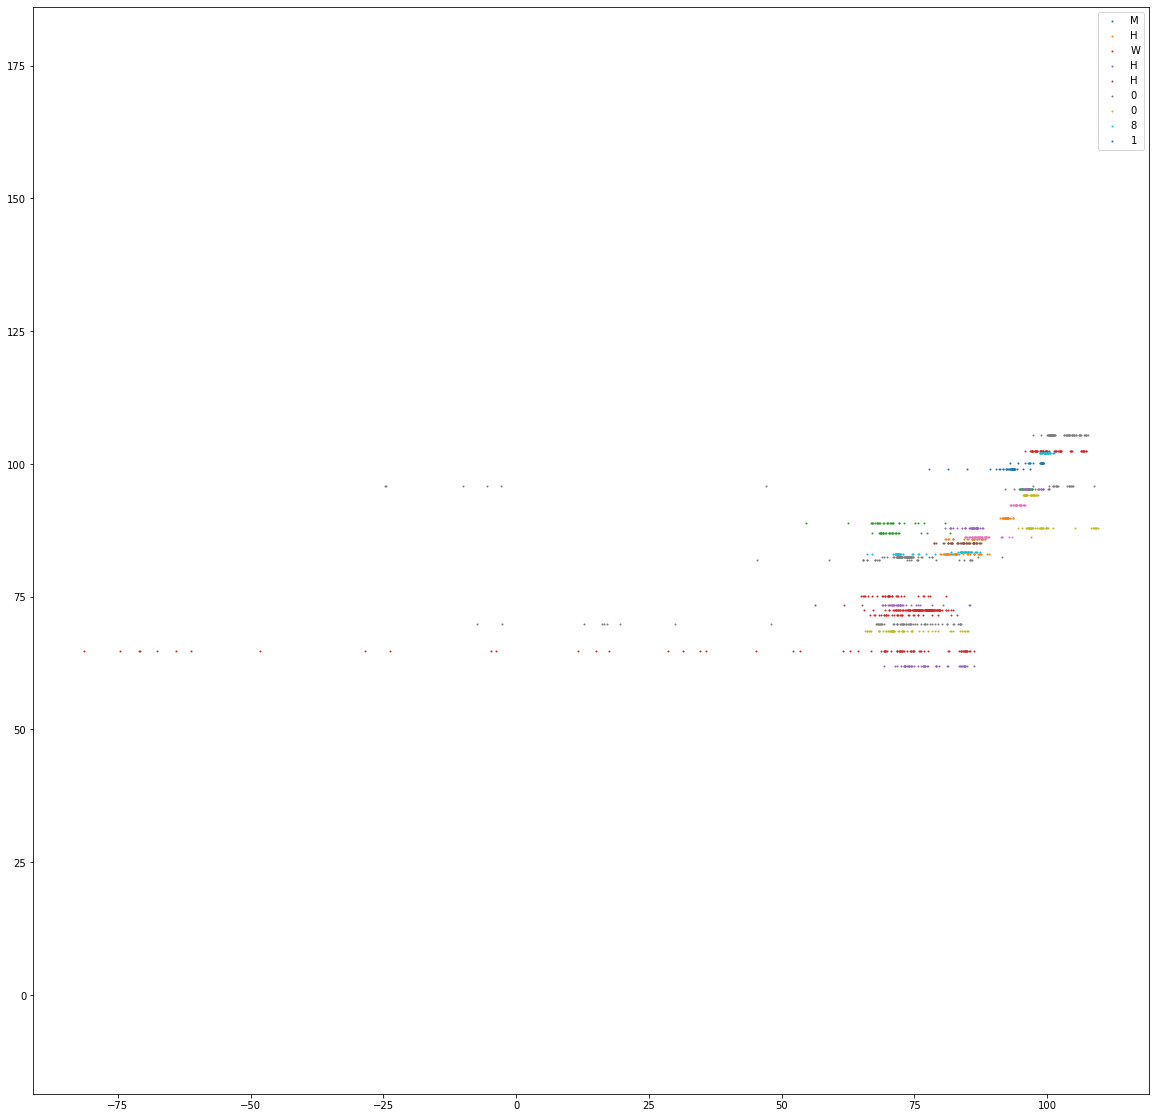

In [136]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
#matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

for e in estimation_list:
    y = np.full((len(e.estimation_values), 1), e.ground_truth_value)
    x = e.estimation_values
    s = 1
    plt.scatter(x, y, s) 
    plt.legend(str(e.qr_code))
    #plt.xlim(50, 120)
    plt.axis('equal')

    
plt.show()


    

IndexError: list index out of range

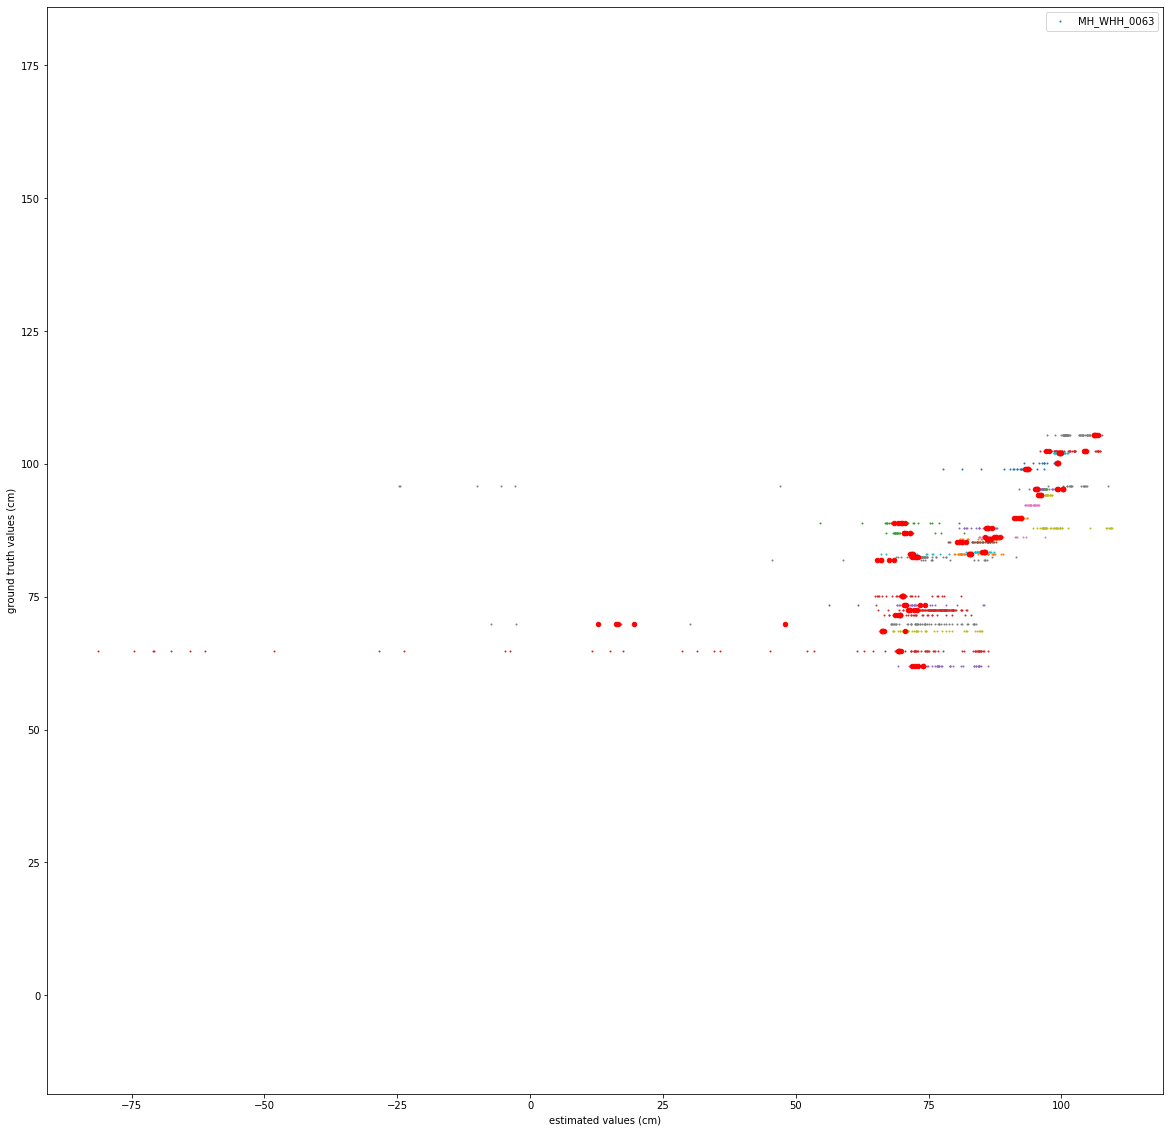

In [137]:
import numpy 


for e in estimation_list:
    y = np.full((len(e.estimation_values), 1), e.ground_truth_value)
    x = e.estimation_values
    s = 1
    plt.scatter(x, y, s) 
    plt.legend(str(e.qr_code))
    plt.xlim(50, 120)
    
# plt.show()

# remove outliers from plot 
for e in estimation_list:
    nr_of_estimations = len(e.estimation_values)

    d = [None] * nr_of_estimations
    
    if(nr_of_estimations == 0): 
       continue       
       
       
       

    for i in e.estimation_values:
        k = 0
        for j in e.estimation_values:
            d[k] = abs(i - j)
            k = k+1
        #d.sort()

        
    sort_index = numpy.argsort(d) 
    
    nr_of_cluster = 5
    estimation_values_filtered = []
    for i in range(1, nr_of_cluster+1):
        value = e.estimation_values[i]
        estimation_values_filtered.append(value)
     
    y = np.full((nr_of_cluster, 1), e.ground_truth_value)
    x = estimation_values_filtered
    s = 20
    plt.scatter(x, y, s, c='red')
    plotname =  [e.qr_code]
    plt.legend(plotname)
   
    plt.xlim(50, 120)
    plt.axis('equal')
    plt.xlabel('estimated values (cm)')
    plt.ylabel('ground truth values (cm)')

plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.plot([60, 100], [60, 100])
plt.show()
